<a href="https://colab.research.google.com/github/sapritanand/Sma-Strategy/blob/main/SmaCrossOver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
stock_symbol = "TCS.NS"
start_date = "2024-01-01"
end_date = "2024-08-22"
tcs_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data = yf.download('TCS.NS',start='2014-01-01',end='2024-08-22')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(tcs_data.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-01-01  3790.000000  3832.000000  3773.000000  3811.100098  3757.422119   
2024-01-02  3811.100098  3811.100098  3767.250000  3783.199951  3729.914795   
2024-01-03  3767.000000  3771.850098  3687.050049  3691.750000  3639.752930   
2024-01-04  3701.750000  3719.000000  3651.000000  3666.800049  3615.154297   
2024-01-05  3675.000000  3747.750000  3674.850098  3737.899902  3685.252930   

             Volume  
Date                 
2024-01-01   825907  
2024-01-02  1344068  
2024-01-03  1803075  
2024-01-04  3598144  
2024-01-05  1963127  


In [ ]:
short = 20
long = 50

tcs_data['SMA20'] = tcs_data['Close'].rolling(window=short).mean()
tcs_data['SMA50'] = tcs_data['Close'].rolling(window=long).mean()


In [ ]:
tcs_data['Signal'] = 0
tcs_data['Signal'][short:] = np.where(tcs_data['SMA20'][short:] > tcs_data['SMA50'][short:], 1, 0)
tcs_data['Position'] = tcs_data['Signal'].diff()

<ipython-input-5-d0216bd9ae85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcs_data['Signal'][short:] = np.where(tcs_data['SMA20'][short:] > tcs_data['SMA50'][short:], 1, 0)


In [ ]:
initial_capital = 100000.0
positions = pd.DataFrame(index=tcs_data.index).fillna(0.0)
positions[stock_symbol] = tcs_data['Signal']
portfolio = positions.multiply(tcs_data['Close'], axis=0)
pos_diff = positions.diff()

In [ ]:
portfolio['holdings'] = (positions.multiply(tcs_data['Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(tcs_data['Close'], axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

In [ ]:
portfolio['returns'] = portfolio['total'].pct_change()

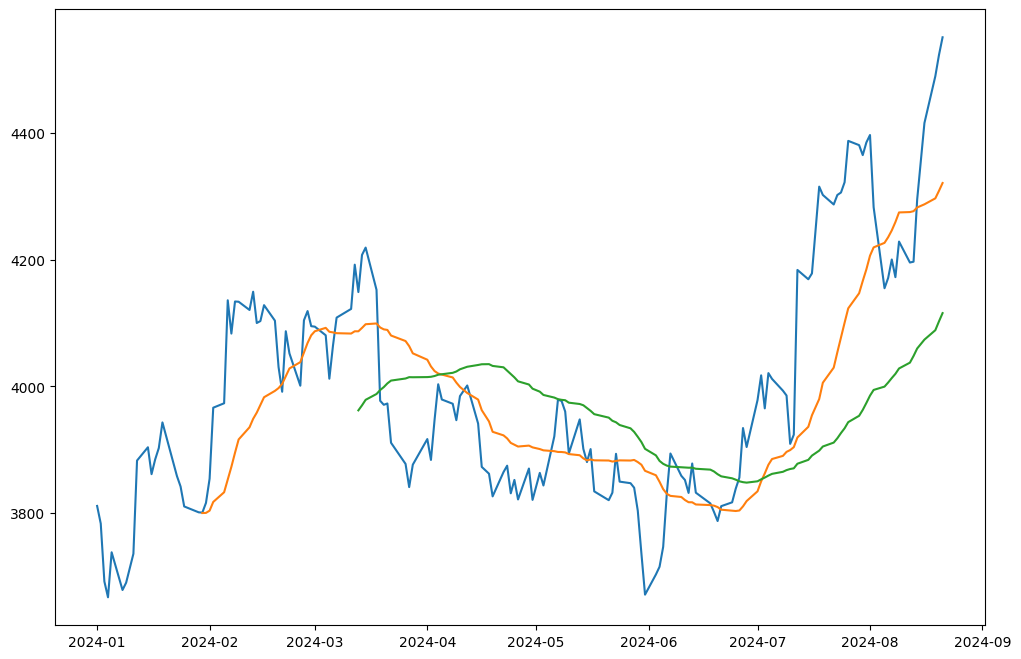

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(tcs_data['Close'], label='TCS Close Price')
plt.plot(tcs_data['SMA20'], label='20-Day SMA')
plt.plot(tcs_data['SMA50'], label='50-Day SMA')


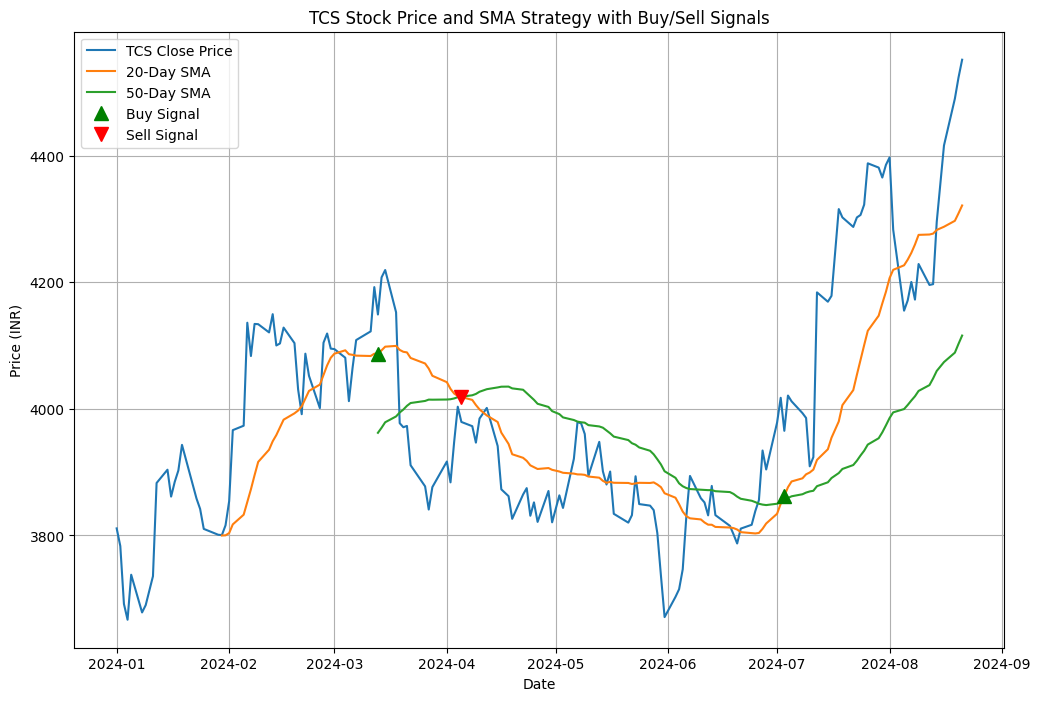

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(tcs_data['Close'], label='TCS Close Price')
plt.plot(tcs_data['SMA20'], label='20-Day SMA')
plt.plot(tcs_data['SMA50'], label='50-Day SMA')
plt.plot(tcs_data[tcs_data['Position'] == 1].index,
         tcs_data['SMA20'][tcs_data['Position'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(tcs_data[tcs_data['Position'] == -1].index,
         tcs_data['SMA20'][tcs_data['Position'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('TCS Stock Price and SMA Strategy with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.show()

Total Returns: ₹416.50
Number of Trades: 3
Winning Trades (%): 0.00%
Losing Trades (%): 33.33%
Maximum Drawdown: ₹99691.90


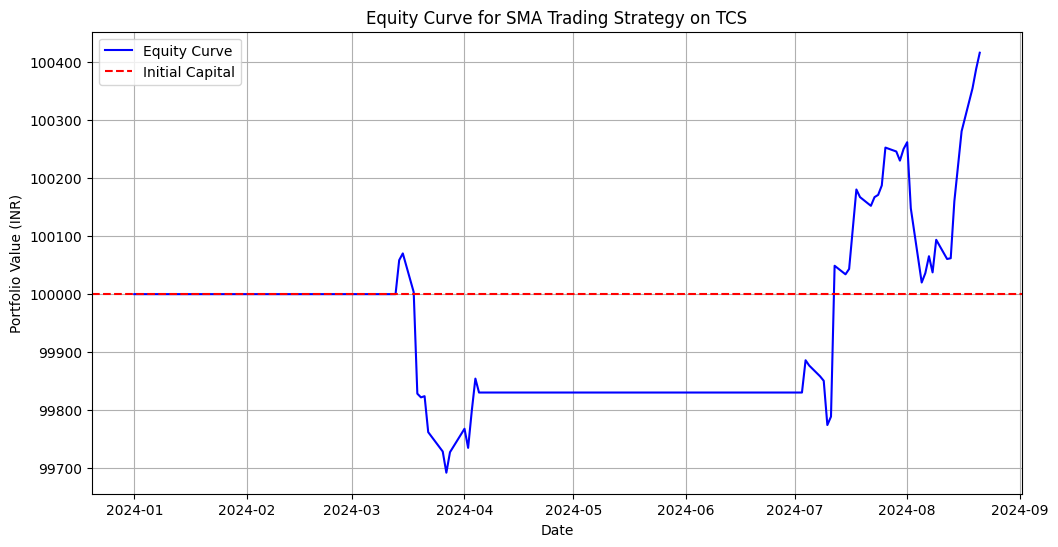

In [ ]:

total_returns = portfolio['total'].iloc[-1] - initial_capital
num_trades = len(tcs_data[tcs_data['Position'] == 1]) + len(tcs_data[tcs_data['Position'] == -1])
winning_trades = len(tcs_data[(tcs_data['Position'] == 1) & (portfolio['returns'] > 0)])
losing_trades = len(tcs_data[(tcs_data['Position'] == -1) & (portfolio['returns'] < 0)])
win_rate = (winning_trades / num_trades) * 100 if num_trades > 0 else 0
lose_rate = (losing_trades / num_trades) * 100 if num_trades > 0 else 0
max_drawdown = portfolio['total'].min()
print(f"Total Returns: ₹{total_returns:.2f}")
print(f"Number of Trades: {num_trades}")
print(f"Winning Trades (%): {win_rate:.2f}%")
print(f"Losing Trades (%): {lose_rate:.2f}%")
print(f"Maximum Drawdown: ₹{max_drawdown:.2f}")
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(portfolio['total'], label='Equity Curve', color='blue')
plt.axhline(initial_capital, color='red', linestyle='--', label='Initial Capital')
plt.title('Equity Curve for SMA Trading Strategy on TCS')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.legend()
plt.grid(True)
plt.show()

